#**GRIP: The Sparks Foundation**

##**Data Science and Business Analytics Intern**

###**Author: Zulfa Attar**

###**Task 1: Predication Using Supervised ML**

**In this we have to predict the percentage of a student based on their no. of study hours.**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
%matplotlib inline

**Reading Data from remote URL**

In [ ]:
url = "http://bit.ly/w-data"
stdata = pd.read_csv(url)
print(stdata.shape)

stdata.head()

(25, 2)


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
stdata.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [ ]:
stdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


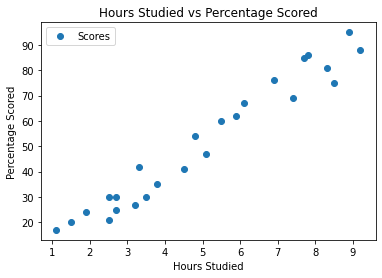

In [ ]:
stdata.plot(kind='scatter', x='Hours', y='Scores')  
plt.title('Hours Studied vs Percentage Scored')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored')  
plt.show()

In [ ]:
stdata.corr(method='pearson')

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [ ]:
stdata.corr(method='spearman')

,Hours,Scores
Hours,1.000000,0.971891
Scores,0.971891,1.000000


In [ ]:
hours= stdata['Hours']
scores= stdata['Scores']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


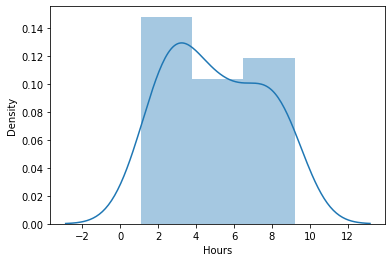

In [ ]:
sns.distplot(hours)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


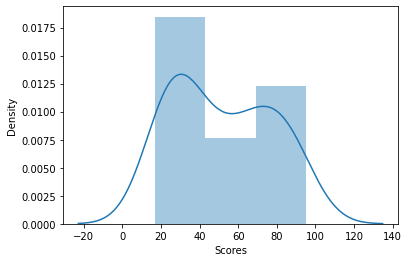

In [ ]:
sns.distplot(scores)

###**Simple Linear Regression**

In [ ]:
X = stdata.iloc[:, :-1].values  
y = stdata.iloc[:, 1].values  

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=50) 

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

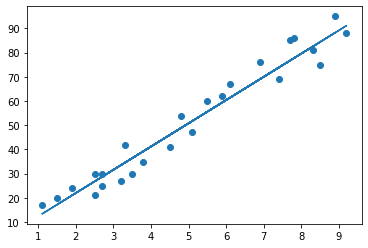

In [ ]:
m= regressor.coef_
c= regressor.intercept_
line = m*X + c

plt.scatter(X, y)
plt.plot(X, line);
plt.show()

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
actVsPredicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
actVsPredicted

,Actual,Predicted
0,95,88.211394
1,30,28.718453
2,76,69.020122
3,35,39.273652
4,17,13.365436


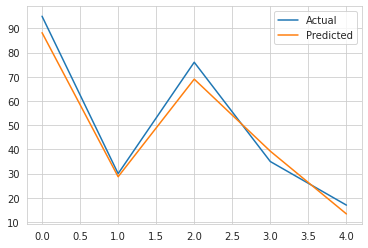

In [ ]:
actVsPredicted.plot(kind='line')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


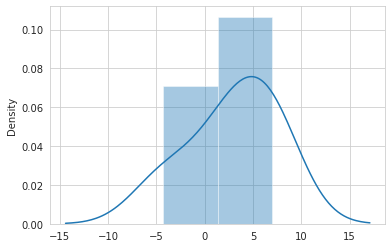

In [ ]:
sns.set_style('whitegrid')
sns.distplot(np.array(y_test-y_pred))
plt.show()

**The predicted score if a student studies for 9.25 hours/day**

In [ ]:
h = 9.25
own_pred = regressor.predict([[h]])
print("No of Hours = {}".format(h))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 91.56986604454478


###**Model Evaluation**

In [ ]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print("R2 Score: ", r2_score(y_test, y_pred))

Mean Absolute Error: 4.5916495300630285
R2 Score:  0.971014141329942
